## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [3]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
from keras.layers import Dropout
from keras.regularizers import l2, l1
from keras.layers import BatchNormalization

def build_mlp(input_shape, out_unit = 10, hidden_unit = [512, 256, 128], en_drop = 0, en_regular = 0, en_banor = 0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit_num in enumerate(hidden_unit):
        if i == 0:
            if en_regular == 0:
                x = keras.layers.Dense(units = unit_num, activation = 'relu', name = 'hidden_'+str(i+1))(input_layer)
            else:
                x = keras.layers.Dense(units = unit_num, activation = 'relu', name = 'hidden_'+str(i+1), 
                                       kernel_regularizer = l2(1e-4))(input_layer)
        else:
            if en_regular == 0:
                x = keras.layers.Dense(units = unit_num, activation = 'relu', name = 'hidden_'+str(i+1))(x)
            else:
                x = keras.layers.Dense(units = unit_num, activation = 'relu', name = 'hidden_'+str(i+1), 
                                       kernel_regularizer = l2(1e-4))(x)
            
        if en_drop == 0:
            x = Dropout(0.15)(x)
            
        if en_banor == 0:
            x = BatchNormalization()(x)

    output_layer = keras.layers.Dense(units = out_unit, activation = 'softmax', name = 'out_layer')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
            
    return model

In [18]:
"""Code Here
設定超參數
"""
EPOCHS = 50
BATCH_SIZE = 64

drop_en =     [0, 1, 0, 1, 1, 0, 1]
regular_en =  [1, 0, 0, 1, 0, 1, 1]
batchnor_en = [0, 0, 1, 0, 1, 1, 1]

In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in range(len(drop_en)):
    print('Case %d: drop %d regular %d batchnor %d' % (i, drop_en[i], regular_en[i], batchnor_en[i]))
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:], en_drop = drop_en[i], en_regular = regular_en[i], en_banor = batchnor_en[i])
    model.summary()
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
              validation_data = (x_test, y_test), shuffle = True)

    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']
    
    exp_tag = 'exp_%d_%d_%d_%d' % (i, drop_en[i], regular_en[i], batchnor_en[i])
    results[exp_tag] = {
        'train-loss': train_loss,
        'val-loss': val_loss,
        'train-acc': train_acc,
        'val-acc': val_acc
    }        

Case 0: drop 0 regular 1 batchnor 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_1 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_2 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)

50000/50000 [==============================] - 38s 756us/step - loss: 1.6218 - acc: 0.4403 - val_loss: 1.7418 - val_acc: 0.4006
Epoch 45/50
50000/50000 [==============================] - 38s 757us/step - loss: 1.6147 - acc: 0.4436 - val_loss: 1.6476 - val_acc: 0.4354
Epoch 46/50
50000/50000 [==============================] - 37s 735us/step - loss: 1.6109 - acc: 0.4453 - val_loss: 1.7193 - val_acc: 0.4100
Epoch 47/50
50000/50000 [==============================] - 38s 765us/step - loss: 1.6256 - acc: 0.4382 - val_loss: 1.6483 - val_acc: 0.4405
Epoch 48/50
50000/50000 [==============================] - 38s 759us/step - loss: 1.6310 - acc: 0.4376 - val_loss: 1.6553 - val_acc: 0.4320
Epoch 49/50
50000/50000 [==============================] - 38s 764us/step - loss: 1.6416 - acc: 0.4337 - val_loss: 1.6305 - val_acc: 0.4396
Epoch 50/50
50000/50000 [==============================] - 38s 764us/step - loss: 1.6315 - acc: 0.4340 - val_loss: 1.6218 - val_acc: 0.4389
Case 1: drop 1 regular 0 batchno

50000/50000 [==============================] - 28s 558us/step - loss: 0.6563 - acc: 0.7630 - val_loss: 1.7604 - val_acc: 0.5057
Epoch 43/50
50000/50000 [==============================] - 28s 557us/step - loss: 0.6447 - acc: 0.7695 - val_loss: 1.7606 - val_acc: 0.4986
Epoch 44/50
50000/50000 [==============================] - 27s 549us/step - loss: 0.6388 - acc: 0.7716 - val_loss: 1.7981 - val_acc: 0.4961
Epoch 45/50
50000/50000 [==============================] - 28s 554us/step - loss: 0.6366 - acc: 0.7716 - val_loss: 1.8660 - val_acc: 0.4803
Epoch 46/50
50000/50000 [==============================] - 28s 563us/step - loss: 0.6265 - acc: 0.7736 - val_loss: 1.7835 - val_acc: 0.5064
Epoch 47/50
50000/50000 [==============================] - 28s 553us/step - loss: 0.6254 - acc: 0.7754 - val_loss: 1.8511 - val_acc: 0.5024
Epoch 48/50
50000/50000 [==============================] - 27s 550us/step - loss: 0.6082 - acc: 0.7795 - val_loss: 1.9097 - val_acc: 0.4862
Epoch 49/50
50000/50000 [=======

50000/50000 [==============================] - 30s 607us/step - loss: 1.4761 - acc: 0.4675 - val_loss: 1.4538 - val_acc: 0.4760
Epoch 41/50
50000/50000 [==============================] - 31s 610us/step - loss: 1.4708 - acc: 0.4696 - val_loss: 1.4553 - val_acc: 0.4786
Epoch 42/50
50000/50000 [==============================] - 30s 604us/step - loss: 1.4779 - acc: 0.4663 - val_loss: 1.4764 - val_acc: 0.4720
Epoch 43/50
50000/50000 [==============================] - 31s 615us/step - loss: 1.4684 - acc: 0.4683 - val_loss: 1.4470 - val_acc: 0.4826
Epoch 44/50
50000/50000 [==============================] - 30s 609us/step - loss: 1.4679 - acc: 0.4693 - val_loss: 1.4530 - val_acc: 0.4714
Epoch 45/50
50000/50000 [==============================] - 31s 612us/step - loss: 1.4610 - acc: 0.4753 - val_loss: 1.4488 - val_acc: 0.4781
Epoch 46/50
50000/50000 [==============================] - 30s 606us/step - loss: 1.4599 - acc: 0.4747 - val_loss: 1.4496 - val_acc: 0.4786
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 38s 758us/step - loss: 1.0580 - acc: 0.6710 - val_loss: 1.9486 - val_acc: 0.4417ss: 1.0574 - 
Epoch 38/50
50000/50000 [==============================] - 37s 749us/step - loss: 1.0573 - acc: 0.6718 - val_loss: 1.9581 - val_acc: 0.4390
Epoch 39/50
50000/50000 [==============================] - 38s 750us/step - loss: 1.0525 - acc: 0.6729 - val_loss: 1.7224 - val_acc: 0.4838
Epoch 40/50
50000/50000 [==============================] - 38s 757us/step - loss: 1.0489 - acc: 0.6754 - val_loss: 1.7727 - val_acc: 0.4766
Epoch 41/50
50000/50000 [==============================] - 37s 745us/step - loss: 1.0446 - acc: 0.6780 - val_loss: 1.8868 - val_acc: 0.4733
Epoch 42/50
50000/50000 [==============================] - 37s 747us/step - loss: 1.0381 - acc: 0.6814 - val_loss: 1.7421 - val_acc: 0.4819
Epoch 43/50
50000/50000 [==============================] - 37s 749us/step - loss: 1.0329 - acc: 0.6839 - val_loss: 1.7323 - val_acc: 0.4846
Epoch 44/50
50000/5

Epoch 38/50
50000/50000 [==============================] - 30s 601us/step - loss: 0.8753 - acc: 0.6831 - val_loss: 1.6407 - val_acc: 0.5040
Epoch 39/50
50000/50000 [==============================] - 30s 601us/step - loss: 0.8640 - acc: 0.6890 - val_loss: 1.6932 - val_acc: 0.5023
Epoch 40/50
50000/50000 [==============================] - 30s 604us/step - loss: 0.8472 - acc: 0.6936 - val_loss: 1.6769 - val_acc: 0.5043
Epoch 41/50
50000/50000 [==============================] - 30s 599us/step - loss: 0.8435 - acc: 0.6937 - val_loss: 1.7120 - val_acc: 0.5013
Epoch 42/50
50000/50000 [==============================] - 30s 596us/step - loss: 0.8394 - acc: 0.6967 - val_loss: 1.7408 - val_acc: 0.4960
Epoch 43/50
50000/50000 [==============================] - 31s 614us/step - loss: 0.8137 - acc: 0.7097 - val_loss: 1.7856 - val_acc: 0.4902
Epoch 44/50
50000/50000 [==============================] - 30s 599us/step - loss: 0.8132 - acc: 0.7044 - val_loss: 1.7816 - val_acc: 0.4942
Epoch 45/50
50000/50

50000/50000 [==============================] - 37s 739us/step - loss: 1.5936 - acc: 0.4498 - val_loss: 1.5640 - val_acc: 0.4669
Epoch 36/50
50000/50000 [==============================] - 37s 741us/step - loss: 1.5898 - acc: 0.4515 - val_loss: 1.5175 - val_acc: 0.4867
Epoch 37/50
50000/50000 [==============================] - 37s 740us/step - loss: 1.5893 - acc: 0.4520 - val_loss: 1.5376 - val_acc: 0.4762
Epoch 38/50
50000/50000 [==============================] - 37s 736us/step - loss: 1.5898 - acc: 0.4535 - val_loss: 1.5543 - val_acc: 0.4701
Epoch 39/50
50000/50000 [==============================] - 37s 743us/step - loss: 1.5873 - acc: 0.4510 - val_loss: 1.5430 - val_acc: 0.4749
Epoch 40/50
50000/50000 [==============================] - 37s 742us/step - loss: 1.5848 - acc: 0.4570 - val_loss: 1.5398 - val_acc: 0.4716
Epoch 41/50
50000/50000 [==============================] - 38s 762us/step - loss: 1.5908 - acc: 0.4533 - val_loss: 1.5693 - val_acc: 0.4668
Epoch 42/50
50000/50000 [=======

50000/50000 [==============================] - 36s 718us/step - loss: 1.2333 - acc: 0.5986 - val_loss: 1.5168 - val_acc: 0.5148
Epoch 36/50
50000/50000 [==============================] - 36s 720us/step - loss: 1.2281 - acc: 0.6002 - val_loss: 1.5738 - val_acc: 0.4991
Epoch 37/50
50000/50000 [==============================] - 36s 726us/step - loss: 1.2225 - acc: 0.6039 - val_loss: 1.5165 - val_acc: 0.5170
Epoch 38/50
50000/50000 [==============================] - 37s 730us/step - loss: 1.2195 - acc: 0.6031 - val_loss: 1.5471 - val_acc: 0.5081
Epoch 39/50
50000/50000 [==============================] - 36s 724us/step - loss: 1.2242 - acc: 0.6049 - val_loss: 1.5621 - val_acc: 0.4991
Epoch 40/50
50000/50000 [==============================] - 36s 722us/step - loss: 1.2143 - acc: 0.6064 - val_loss: 1.5407 - val_acc: 0.5081
Epoch 41/50
50000/50000 [==============================] - 37s 732us/step - loss: 1.2120 - acc: 0.6103 - val_loss: 1.5800 - val_acc: 0.4988
Epoch 42/50
50000/50000 [=======

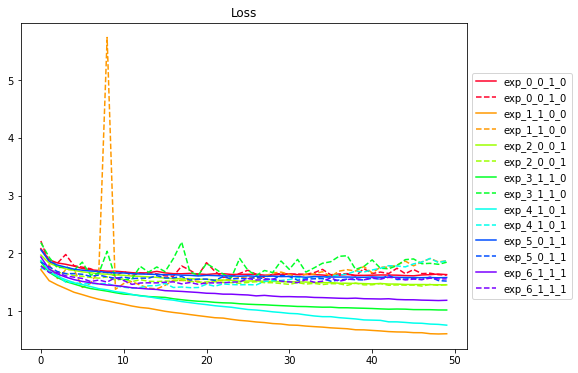

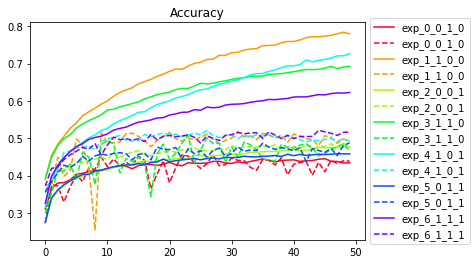

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_num = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_map = [cm(1.*i/color_num) for i in range(color_num)]

plt.figure(figsize = (8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_map[i])
    plt.plot(range(len(results[cond]['val-loss'])), results[cond]['val-loss'], '--', label = cond, color = color_map[i])
plt.title('Loss')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label = cond, color = color_map[i])
    plt.plot(range(len(results[cond]['val-acc'])), results[cond]['val-acc'], '--', label = cond, color = color_map[i])
plt.title('Accuracy')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()
